# ObsID : 0827220601, Instru : EPN
Third detection of the source **0945070132 - 1**.

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob("*EPN_spectrum_grp_cstat.fits")[0])


1 spectrum  in use
 
Spectral Data File: source3_0827221701_EPN_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.217e-03 +/- 1.457e-03 (20.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-205
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.184e+04 sec
 Using fit statistic: cstat
 Using Background File                source3_0827221701_EPN_background_spectrum.fits
  Background Exposure Time: 1.184e+04 sec
 Using Response (RMF) File            source3_0827221701_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  source3_0827221701_EPN.arf



In [4]:
print(f"Number of counts = {4.217e-03*1.184e+04} cts")

Number of counts = 49.929280000000006 cts


The number of counts is lower than 100 cts, indicating that the C-statistic test should be a better choice for a goodness-of-fit statistic.

## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     7 channels (1-7) ignored in spectrum #     1
    18 channels (188-205) ignored in spectrum #     1



(-0.5, 852.5, 660.5, -0.5)

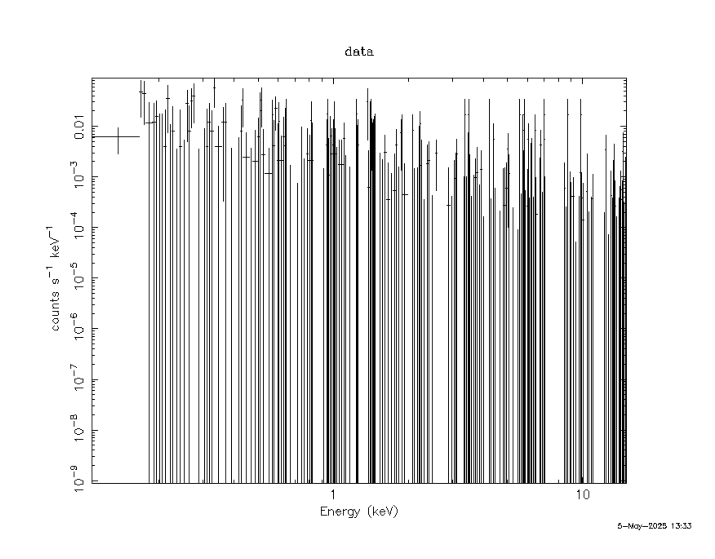

In [6]:
img = plt.imread(glob.glob('*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              6.317383e+07     using 180 bins.

T

### Bremsstrahlung model

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.162776e+07     using 180 bins.

Test statistic : Chi-Squared              3.857889e+11     using 180 bins.
 Null hypothesis probability of 0.000000e+00 with 177 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
7.71452e+06  2.15652e+06  -3     0.0559835       199.318      0.467027
4.17012e+06  4.08242e+06  -1     0.0246374       199.347      0.232710
2.22345e+06  3.61971e+06  -1    0.00230882       199.361      0.1154

### Apec model

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic              4.398401e+06     using 180 bins.

Test statistic : Chi-Squared              8.687636e+10     using 180 bins.
 Null hypothesis probability of 0.000000e+00 with 177 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
3.98599e+06  1.32644e+06  -3    0.00419569       45.9240

### Powerlaw model

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsserlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              3.117621e+07     using 180 bins.

Test statistic : Chi-Squared              2.479893e+12     using 180 bins.
 Null hypothesis probability of 0.000000e+00 with 177 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
1.58891e+07  8.38373e+06  -1      0.238999       8.12922     0.0754502
240.294      4.44486e+07  -2       1448.81      0.557714     0.0288510
240.29       0.00649348    0       1345.11    -0.0290018     0.067

### Black body + Powerlaw model

In [11]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              9.435388e+07     using 180 bins.

Test statistic : Chi-Squared              2.541760e+13     using 180 bins.
 Null hypothesis probability of 0.000000e+00 with 175 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
3.46863e+06  9.061

## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Bremss`` : **9.1112e-15 ergs/cm^2/s**.

In [16]:
Flux_bremss = 9.1112e-15 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremsstrahlung : F_x-ray = {Flux_bremss} ergs/cm^2/s")

X-ray flux : 
Bremsstrahlung : F_x-ray = 9.1112e-15 ergs/cm^2/s


### Optical flux

In [17]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G = 19.7505

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.3212630781247998e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [18]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Bremsstrahlung : F_x-ray/F_optical = {Flux_bremss/F}")

X-ray Flux / Optical Flux ratio : 
Bremsstrahlung : F_x-ray/F_optical = 0.06895825782804023


## Luminosity

In [20]:
"""GAIA"""

P_mas = 0.1954
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Bremsstrahlung : L_x-ray = {Luminosity_bremss} erg/s")

"""Alert file"""
Fx = 1.2*10**(-12)
Lx = 4*np.pi*Fx*(d_cm)**2 # erg/s
print(f"Alert file : L_x = {Lx} erg/s")

(GAIA)
Distance : d = 1.5791709314227227e+22 cm
Luminosity :
Bremsstrahlung : L_x-ray = 2.8552472782581097e+31 erg/s
Alert file : L_x = 3.7605328978726525e+33 erg/s
